In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
bias = 100

X,y,coff = make_regression(100,n_features=1,noise=4,bias=bias,random_state=42,coef=True)

In [4]:
X

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424],
       [ 0.64768854],
       [-0.46341769],
       [ 0.54256004],
       [ 0.61167629],
       [ 1.0035329 ],
       [ 0.8219025 ],
       [ 1.53803657],
       [ 0.73846658],
       [-0.21967189],
       [-0.8084936 ],
       [ 0.09176078],
       [-1.95967012],
       [ 0.51326743],
       [ 1.03099952],
       [-2.6197451 ],
       [ 0.49671415],
       [ 0.09707755],
       [-0.46572975],
       [ 0.91540212],
       [ 1.56464366],
       [ 1.46564877],
       [-0.60063869],
       [-0.03582604],
       [-0.60170661],
       [-1.19620662],
       [ 0.35711257],
       [ 0.37569802],
       [ 0.26105527],
       [-0.5297602 ],
       [-0.90802408],
       [ 0.19686124],
       [-0.29900735],
       [ 0.36163603],
       [ 0.82254491],
       [-0.29169375],
       [ 0.36139561],
       [-0.676922  ],
       [ 1.52302986],
       [-0.51827022],
       [-0.23415337],
       [-0

In [5]:
y

array([143.6355659 ,  98.15395618,  59.54263244, 112.08091485,
        80.90389315, 128.84697755,  76.36630826, 115.95303472,
       124.70857446, 138.07057831, 134.89056229, 169.2728967 ,
       132.96975172,  95.66818158,  60.62696635, 107.34488997,
        16.73905559, 120.87526015, 137.2748887 , -12.82160755,
       119.15132948, 103.55559417,  76.58958292, 134.35782912,
       169.07209013, 162.53707615,  80.54950141, 100.20252668,
        71.36154066,  45.20159974, 117.05811169, 121.21811155,
       108.84487303,  78.05514645,  59.79923914, 103.32571045,
        84.43198119, 112.0903679 , 141.1603495 ,  93.39368494,
       118.16495966,  70.44656705, 162.90869839,  78.74189255,
        91.08593582,  87.81525892,  86.78785093,  68.5502794 ,
       117.63115305, 108.75477365,  89.43122065, 103.05387827,
        82.13760606, 172.62661221,  94.08289277, 118.51844794,
       116.2978635 ,  95.63999576,  90.57799042,  16.07830852,
       118.98316757,  90.54632819,  54.51969292,  68.88

In [10]:
y.shape

(100,)

In [6]:
coff

array(41.74110031)

In [7]:
expected_theta = np.hstack([[bias],coff])

In [8]:
expected_theta


array([100.        ,  41.74110031])

In [9]:
expected_theta.shape

(2,)

In [189]:
X_update = np.hstack([np.ones((X.shape[0],1)),X])

In [176]:
X_update

array([[ 1.        ,  0.93128012],
       [ 1.        ,  0.08704707],
       [ 1.        , -1.05771093],
       [ 1.        ,  0.31424733],
       [ 1.        , -0.47917424],
       [ 1.        ,  0.64768854],
       [ 1.        , -0.46341769],
       [ 1.        ,  0.54256004],
       [ 1.        ,  0.61167629],
       [ 1.        ,  1.0035329 ],
       [ 1.        ,  0.8219025 ],
       [ 1.        ,  1.53803657],
       [ 1.        ,  0.73846658],
       [ 1.        , -0.21967189],
       [ 1.        , -0.8084936 ],
       [ 1.        ,  0.09176078],
       [ 1.        , -1.95967012],
       [ 1.        ,  0.51326743],
       [ 1.        ,  1.03099952],
       [ 1.        , -2.6197451 ],
       [ 1.        ,  0.49671415],
       [ 1.        ,  0.09707755],
       [ 1.        , -0.46572975],
       [ 1.        ,  0.91540212],
       [ 1.        ,  1.56464366],
       [ 1.        ,  1.46564877],
       [ 1.        , -0.60063869],
       [ 1.        , -0.03582604],
       [ 1.        ,

In [177]:
X.shape

(100, 1)

In [178]:
X_update.shape

(100, 2)

In [179]:
class LinearRegression:
    
    def __init__(self, lr = 0.01,itrs=100):
        self.lr = lr #learning rate
        self.itrs = itrs
    
    def fit(self,X,y):
        
        self.X = X
        self.y = y.reshape(-1,1)
        
        self.theta = np.zeros((self.X.shape[1],1))
        
        errors = []
        
        for i in range(self.itrs):
            self.gradient_dec()
            errors.append(self.error())
            
        return errors
    
    def gradient_dec(self):
        d_theta = self.gradient()
        self.theta -= d_theta * self.lr
        
    def gradient(self):
        yh = LinearRegression.hypothesis(self.X,self.theta)
        d_theta = np.mean((yh-self.y)*self.X,axis=0)
        
        return d_theta.reshape(-1,1)
    def predict(self,X):
        return LinearRegression.hypothesis(X,self.theta).flatten()
    
    
    def error(self):   
        yh = LinearRegression.hypothesis(self.X,self.theta)
        return np.sum((yh - self.y) **2)
    
    
    
    @classmethod
    def hypothesis(cls,X,theta):
        return np.dot(X,theta)

In [180]:
model = LinearRegression(itrs=1000)

In [181]:
errors = model.fit(X_update,y)

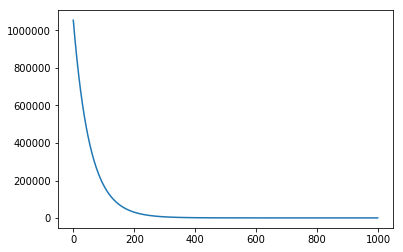

In [182]:
plt.plot(errors)

In [183]:
model.theta

array([[100.45037012],
       [ 42.79062966]])

In [184]:
expected_theta

array([100.        ,  41.74110031])

In [185]:
yh = model.predict(X_update)

In [186]:
yh

array([140.30043281, 104.17516898,  55.19025348, 113.89721135,
        79.94620277, 128.16537049,  80.62043525, 123.66685601,
       126.62438367, 143.3921747 , 135.6200958 , 166.26392324,
       132.04982006,  91.05047172,  65.85441978, 104.37687153,
        16.5948516 , 122.41340677, 144.56748887, -11.65017242,
       121.70508149, 104.60437958,  80.52150072, 139.62100313,
       167.40245734, 163.1664038 ,  74.74866239,  98.91735135,
        74.70296532,  49.26393548, 115.73144192, 116.52672489,
       111.62108959,  77.78159744,  61.59544819, 108.87418636,
        87.65565732, 115.92500334, 135.64758483,  87.9686109 ,
       115.91471564,  71.4844515 , 165.62177666,  78.27326115,
        90.43079978,  83.67181536,  87.5659534 ,  72.84528962,
       114.51783711, 109.38777487,  86.42950056, 100.66917815,
        90.43150231, 163.69038686,  83.97245687, 115.15401309,
       114.62534093,  92.50590561,  90.41223898,  15.40104478,
       114.31812723,  90.78926006,  53.10959997,  70.40

In [187]:
y[:5]

array([143.6355659 ,  98.15395618,  59.54263244, 112.08091485,
        80.90389315])

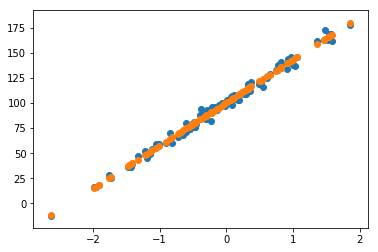

In [188]:
plt.scatter(X,y)
plt.scatter(X,yh)